<a href="https://colab.research.google.com/github/Dogdriip/dg-univ-2020-ml/blob/main/v1_2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# v1.2.2

In [1]:
from google.colab import files
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline 
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
train = pd.read_csv('/content/drive/My Drive/dg_univ_2020_ml/train.csv')
test = pd.read_csv('/content/drive/My Drive/dg_univ_2020_ml/test.csv')

In [4]:
print(train.shape)
print(test.shape)

(11769, 15)
(5789, 13)


In [5]:
train.head()

,no,모델명,연월,연식,연료,주행거리,인승,최대출력(마력),기통,최대토크(kgm),구동방식,자동수동,국산/수입,신차가(만원),가격(만원)
0,0,기아 더 뉴 K7 2.4 GDI 프레스티지 스페셜,12/12(13년형),2013.0,가솔린,4만km,NaN,201.0,4.0,25.5,FF,NaN,국산,3141.0,1870.0
1,1,현대 YF쏘나타 2.0 Y20 LPi 프리미어,10/03,2010.0,LPG,9만km,NaN,157.0,NaN,20.0,FF,NaN,국산,NaN,700.0
2,2,현대 그랜져HG 220 디젤 프리미엄,14/09(15년형),2015.0,디젤,3만km,NaN,202.0,4.0,45.0,FF,NaN,국산,3389.0,2990.0
3,3,쌍용 뉴카이런 2.0 LV5 2WD 고급형,07/06(08년형),2008.0,디젤,16만km,NaN,151.0,4.0,33.8,FR,NaN,국산,2499.0,420.0
4,4,현대 뉴스타렉스 점보 밴 TCI 3인승 GX 윈도우밴 일반형,04/03,2004.0,디젤,16만km,3.0,103.0,NaN,24.0,FR,수동,국산,1445.0,450.0


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11769 entries, 0 to 11768
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   no         11769 non-null  int64  
 1   모델명        11769 non-null  object 
 2   연월         11769 non-null  object 
 3   연식         11769 non-null  float64
 4   연료         11769 non-null  object 
 5   주행거리       11769 non-null  object 
 6   인승         765 non-null    float64
 7   최대출력(마력)   10644 non-null  float64
 8   기통         8698 non-null   float64
 9   최대토크(kgm)  10545 non-null  float64
 10  구동방식       10808 non-null  object 
 11  자동수동       1313 non-null   object 
 12  국산/수입      11769 non-null  object 
 13  신차가(만원)    9544 non-null   float64
 14  가격(만원)     11769 non-null  float64
dtypes: float64(7), int64(1), object(7)
memory usage: 1.3+ MB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5789 entries, 0 to 5788
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   no         5789 non-null   int64  
 1   모델명        5789 non-null   object 
 2   연월         5789 non-null   object 
 3   연식         5789 non-null   float64
 4   연료         5789 non-null   object 
 5   주행거리       5789 non-null   object 
 6   인승         389 non-null    float64
 7   최대출력(마력)   5237 non-null   float64
 8   기통         4275 non-null   float64
 9   최대토크(kgm)  5183 non-null   float64
 10  구동방식       5312 non-null   object 
 11  자동수동       665 non-null    object 
 12  국산/수입      5789 non-null   object 
dtypes: float64(5), int64(1), object(7)
memory usage: 588.1+ KB


# Column name 영어로 모두 바꾸기

In [8]:
train.columns = ['no', 'modelname', 'ym', 'yeartype', 'fuel', 'dist', 'people', 'power', 'cylinder', 'torque', 'type', 'mission', 'country', 'newprice', 'price']
test.columns = ['no', 'modelname', 'ym', 'yeartype', 'fuel', 'dist', 'people', 'power', 'cylinder', 'torque', 'type', 'mission', 'country']

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11769 entries, 0 to 11768
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   no         11769 non-null  int64  
 1   modelname  11769 non-null  object 
 2   ym         11769 non-null  object 
 3   yeartype   11769 non-null  float64
 4   fuel       11769 non-null  object 
 5   dist       11769 non-null  object 
 6   people     765 non-null    float64
 7   power      10644 non-null  float64
 8   cylinder   8698 non-null   float64
 9   torque     10545 non-null  float64
 10  type       10808 non-null  object 
 11  mission    1313 non-null   object 
 12  country    11769 non-null  object 
 13  newprice   9544 non-null   float64
 14  price      11769 non-null  float64
dtypes: float64(7), int64(1), object(7)
memory usage: 1.3+ MB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5789 entries, 0 to 5788
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   no         5789 non-null   int64  
 1   modelname  5789 non-null   object 
 2   ym         5789 non-null   object 
 3   yeartype   5789 non-null   float64
 4   fuel       5789 non-null   object 
 5   dist       5789 non-null   object 
 6   people     389 non-null    float64
 7   power      5237 non-null   float64
 8   cylinder   4275 non-null   float64
 9   torque     5183 non-null   float64
 10  type       5312 non-null   object 
 11  mission    665 non-null    object 
 12  country    5789 non-null   object 
dtypes: float64(5), int64(1), object(7)
memory usage: 588.1+ KB


In [11]:
# sns.heatmap(train.isnull(), cbar=False)

In [12]:
# sns.heatmap(test.isnull(), cbar=False)

In [13]:
train_no = train['no']
test_no = test['no']
train = train.drop(['no'], axis=1)
test = test.drop(['no'], axis=1)

# 이제 하나씩 처리하자
```
0   no         11769 non-null  int64    
1   모델명        11769 non-null  object   
2   연월         11769 non-null  object   
3   연식         11769 non-null  float64  
4   연료         11769 non-null  object   
5   주행거리       11769 non-null  object   
6   인승         765 non-null    float64  
7   최대출력(마력)   10644 non-null  float64  
8   기통         8698 non-null   float64  
9   최대토크(kgm)  10545 non-null  float64  
10  구동방식       10808 non-null  object   
11  자동수동       1313 non-null   object   
12  국산/수입      11769 non-null  object   
13  신차가(만원)    9544 non-null   float64  
14  가격(만원)     11769 non-null  float64  
```

```
0   no         11769 non-null  int64  
1   modelname  11769 non-null  object 
2   ym         11769 non-null  object 
3   yeartype   11769 non-null  float64
4   fuel       11769 non-null  object 
5   dist       11769 non-null  object 
6   people     765 non-null    float64
7   power      10644 non-null  float64
8   cylinder   8698 non-null   float64
9   torque     10545 non-null  float64
10  type       10808 non-null  object 
11  mission    1313 non-null   object 
12  country    11769 non-null  object 
13  newprice   9544 non-null   float64
14  price      11769 non-null  float64
```

# 1 모델명 modelname 11769 non-null object

- 역시 이번에도 모델명은 날리자

In [106]:
train = train.drop(['modelname'], axis=1)
test = test.drop(['modelname'], axis=1)

print(train.shape)
print(test.shape)

(11769, 13)
(5789, 11)


# 2 연월 ym 11769 non-null object

- 생각해보면, 그리고 데이터 명세 다시 보니까,
- 어차피 연식(yeartype)에 있는 정보다
- 이거 날리자

In [107]:
train = train.drop(['ym'], axis=1)
test = test.drop(['ym'], axis=1)

print(train.shape)
print(test.shape)

(11769, 12)
(5789, 10)


# 3 연식 yeartype 11769 non-null float64

건들지 말자

# 4 연료 fuel 11769 non-null object

- 범주형
- 이거 생각 좀 해보자
- 그냥 큰 범주로 산입할까?

In [108]:
train_fuel = train['fuel']
test_fuel = test['fuel']

In [109]:
print(train_fuel.value_counts())
print()
print(test_fuel.value_counts())

가솔린          6671
디젤           3967
LPG           934
가솔린+전기         79
가솔린/LPG겸용      41
기타             32
전기             24
LPG+전기         14
가솔린/CNG겸용       4
CNG             2
수소              1
Name: fuel, dtype: int64

가솔린          3280
디젤           1932
LPG           469
가솔린+전기         34
가솔린/LPG겸용      33
전기             19
기타             11
LPG+전기          8
CNG             2
가솔린/CNG겸용       1
Name: fuel, dtype: int64


## 산입

- 일단 그냥 수소만 기타로 갖다박을까?



In [110]:
train_fuel = train_fuel.replace('수소', '기타')

In [111]:
train_fuel.value_counts()

가솔린          6671
디젤           3967
LPG           934
가솔린+전기         79
가솔린/LPG겸용      41
기타             33
전기             24
LPG+전기         14
가솔린/CNG겸용       4
CNG             2
Name: fuel, dtype: int64

In [112]:
train_fuel_dummies = pd.get_dummies(train_fuel)
test_fuel_dummies = pd.get_dummies(test_fuel)

train_fuel_dummies = train_fuel_dummies.add_prefix('fuel_')
test_fuel_dummies = test_fuel_dummies.add_prefix('fuel_')

train = train.drop(['fuel'], axis=1)
test = test.drop(['fuel'], axis=1)

train = train.join(train_fuel_dummies)
test = test.join(test_fuel_dummies)

In [113]:
train.head()

,yeartype,dist,people,power,cylinder,torque,type,mission,country,newprice,price,fuel_CNG,fuel_LPG,fuel_LPG+전기,fuel_가솔린,fuel_가솔린+전기,fuel_가솔린/CNG겸용,fuel_가솔린/LPG겸용,fuel_기타,fuel_디젤,fuel_전기
0,2013.0,4만km,NaN,201.0,4.0,25.5,FF,NaN,국산,3141.0,1870.0,0,0,0,1,0,0,0,0,0,0
1,2010.0,9만km,NaN,157.0,NaN,20.0,FF,NaN,국산,NaN,700.0,0,1,0,0,0,0,0,0,0,0
2,2015.0,3만km,NaN,202.0,4.0,45.0,FF,NaN,국산,3389.0,2990.0,0,0,0,0,0,0,0,0,1,0
3,2008.0,16만km,NaN,151.0,4.0,33.8,FR,NaN,국산,2499.0,420.0,0,0,0,0,0,0,0,0,1,0
4,2004.0,16만km,3.0,103.0,NaN,24.0,FR,수동,국산,1445.0,450.0,0,0,0,0,0,0,0,0,1,0


In [114]:
print(train.shape)
print(test.shape)

(11769, 21)
(5789, 19)


# 5 주행거리 dist 11769 non-null object

- %d만{km|ml}
- 중간중간에 '등록'이라고 되어있는 게 있다
- 평균으로 채워야 한다
- 평균을 구하려면 일단 수치를 모두 구해야 한다
- 등록은 스킵해야 하네 

In [115]:
train_dist = train['dist']
test_dist = test['dist']

train_dist.head()

0     4만km
1     9만km
2     3만km
3    16만km
4    16만km
Name: dist, dtype: object

In [116]:
def preprocess_dist(x):
    # '등록'은 나중에 평균으로 채울 거임
    if x == '등록':
        return None

    if x[-2:] == 'km':
        # kilometer
        x = x.split('km')[0]
        weight = 1
    else:
        # mile
        assert x[-2:] == 'ml'
        x = x.split('ml')[0]
        weight = 1.609344

    if x[-1] == '만':
        x = float(x.split('만')[0]) * 10000
    elif x[-1] == '천':
        x = float(x.split('천')[0]) * 1000

    return float(x * weight)


In [117]:
train_dist = train_dist.apply(preprocess_dist)
test_dist = test_dist.apply(preprocess_dist)

train_dist

0         40000.0
1         90000.0
2         30000.0
3        160000.0
4        160000.0
           ...   
11764    110000.0
11765      5000.0
11766       230.0
11767      9000.0
11768      3000.0
Name: dist, Length: 11769, dtype: float64

In [118]:
# 등록 처리
train_dist.isna().sum()

29

In [119]:
train_dist = train_dist.fillna(train_dist.mean())
test_dist = test_dist.fillna(test_dist.mean())

In [120]:
train_dist.isna().sum()

0

In [121]:
train = train.drop(['dist'], axis=1)
test = test.drop(['dist'], axis=1)

train_dist.name = 'dist'
test_dist.name = 'dist'

train = train.join(train_dist)
test = test.join(test_dist)

In [122]:
train.head()

,yeartype,people,power,cylinder,torque,type,mission,country,newprice,price,fuel_CNG,fuel_LPG,fuel_LPG+전기,fuel_가솔린,fuel_가솔린+전기,fuel_가솔린/CNG겸용,fuel_가솔린/LPG겸용,fuel_기타,fuel_디젤,fuel_전기,dist
0,2013.0,NaN,201.0,4.0,25.5,FF,NaN,국산,3141.0,1870.0,0,0,0,1,0,0,0,0,0,0,40000.0
1,2010.0,NaN,157.0,NaN,20.0,FF,NaN,국산,NaN,700.0,0,1,0,0,0,0,0,0,0,0,90000.0
2,2015.0,NaN,202.0,4.0,45.0,FF,NaN,국산,3389.0,2990.0,0,0,0,0,0,0,0,0,1,0,30000.0
3,2008.0,NaN,151.0,4.0,33.8,FR,NaN,국산,2499.0,420.0,0,0,0,0,0,0,0,0,1,0,160000.0
4,2004.0,3.0,103.0,NaN,24.0,FR,수동,국산,1445.0,450.0,0,0,0,0,0,0,0,0,1,0,160000.0


# 6 인승 people 765 non-null float64

- 결측치가 많긴 한데, 일반화해볼 수 있을까?
- 없는 수치는 그냥 4인승 정도고, 특별한 수치만 기록되어있는 거 아닐까?
- 카테고리를 찍어보자

In [123]:
train_people = train['people']
test_people = test['people']

In [124]:
print(train_people.value_counts())
print()
print(test_people.value_counts())

5.0     327
4.0     232
3.0      76
2.0      67
7.0      20
15.0     17
6.0       9
12.0      5
9.0       4
14.0      4
46.0      2
11.0      1
18.0      1
Name: people, dtype: int64

5.0     176
4.0     110
2.0      38
3.0      38
6.0       9
15.0      4
14.0      3
7.0       3
9.0       3
12.0      2
16.0      2
11.0      1
Name: people, dtype: int64


- 못 살릴듯.. 그냥 드랍하자

In [125]:
train = train.drop(['people'], axis=1)
test = test.drop(['people'], axis=1)

# 7 최대출력(마력) power 10644 non-null float64

- 결측치만 채워서 그대로 쓰자

In [126]:
train_power = train['power']
test_power = test['power']

train_power

0        201.0
1        157.0
2        202.0
3        151.0
4        103.0
         ...  
11764    210.0
11765      NaN
11766    370.0
11767    425.0
11768    425.0
Name: power, Length: 11769, dtype: float64

In [127]:
train_power.isna().sum()

1125

In [128]:
train_power = train_power.fillna(train_power.mean())
test_power = test_power.fillna(test_power.mean())

In [129]:
train_power.isna().sum()

0

In [130]:
train = train.drop(['power'], axis=1)
test = test.drop(['power'], axis=1)

train = train.join(train_power)
test = test.join(test_power)

In [131]:
train.head()

,yeartype,cylinder,torque,type,mission,country,newprice,price,fuel_CNG,fuel_LPG,fuel_LPG+전기,fuel_가솔린,fuel_가솔린+전기,fuel_가솔린/CNG겸용,fuel_가솔린/LPG겸용,fuel_기타,fuel_디젤,fuel_전기,dist,power
0,2013.0,4.0,25.5,FF,NaN,국산,3141.0,1870.0,0,0,0,1,0,0,0,0,0,0,40000.0,201.0
1,2010.0,NaN,20.0,FF,NaN,국산,NaN,700.0,0,1,0,0,0,0,0,0,0,0,90000.0,157.0
2,2015.0,4.0,45.0,FF,NaN,국산,3389.0,2990.0,0,0,0,0,0,0,0,0,1,0,30000.0,202.0
3,2008.0,4.0,33.8,FR,NaN,국산,2499.0,420.0,0,0,0,0,0,0,0,0,1,0,160000.0,151.0
4,2004.0,NaN,24.0,FR,수동,국산,1445.0,450.0,0,0,0,0,0,0,0,0,1,0,160000.0,103.0


# 8 기통 cylinder 8698 non-null float64

- 범주형으로 조질 수 있겠다
- 단 결측치는 어떻게 할 것인가?
- 최빈값으로 일단 조져보자



In [132]:
train_cylinder = train['cylinder']
test_cylinder = test['cylinder']

train_cylinder.value_counts()

4.0    5621
6.0    2459
3.0     402
8.0     171
5.0      45
Name: cylinder, dtype: int64

In [133]:
test_cylinder.value_counts()

4.0    2747
6.0    1222
3.0     173
8.0      95
5.0      38
Name: cylinder, dtype: int64

In [134]:
train_cylinder = train_cylinder.fillna(4.0)
test_cylinder = test_cylinder.fillna(4.0)

In [135]:
train_cylinder.isna().sum()

0

In [136]:
train_cylinder_dummies = pd.get_dummies(train_cylinder)
test_cylinder_dummies = pd.get_dummies(test_cylinder)

train_cylinder_dummies = train_cylinder_dummies.add_prefix("cylinder_")
test_cylinder_dummies = test_cylinder_dummies.add_prefix("cylinder_")

train = train.drop(['cylinder'], axis=1)
test = test.drop(['cylinder'], axis=1)

train = train.join(train_cylinder_dummies)
test = test.join(test_cylinder_dummies)

In [137]:
train.head()

,yeartype,torque,type,mission,country,newprice,price,fuel_CNG,fuel_LPG,fuel_LPG+전기,fuel_가솔린,fuel_가솔린+전기,fuel_가솔린/CNG겸용,fuel_가솔린/LPG겸용,fuel_기타,fuel_디젤,fuel_전기,dist,power,cylinder_3.0,cylinder_4.0,cylinder_5.0,cylinder_6.0,cylinder_8.0
0,2013.0,25.5,FF,NaN,국산,3141.0,1870.0,0,0,0,1,0,0,0,0,0,0,40000.0,201.0,0,1,0,0,0
1,2010.0,20.0,FF,NaN,국산,NaN,700.0,0,1,0,0,0,0,0,0,0,0,90000.0,157.0,0,1,0,0,0
2,2015.0,45.0,FF,NaN,국산,3389.0,2990.0,0,0,0,0,0,0,0,0,1,0,30000.0,202.0,0,1,0,0,0
3,2008.0,33.8,FR,NaN,국산,2499.0,420.0,0,0,0,0,0,0,0,0,1,0,160000.0,151.0,0,1,0,0,0
4,2004.0,24.0,FR,수동,국산,1445.0,450.0,0,0,0,0,0,0,0,0,1,0,160000.0,103.0,0,1,0,0,0


# 9 최대토크(kgm) torque 10545 non-null float64

- 얘도 결측치 mean으로 채우고 그대로 쓰자

In [138]:
train_torque = train['torque']
test_torque = test['torque']

train_torque

0        25.5
1        20.0
2        45.0
3        33.8
4        24.0
         ... 
11764    30.5
11765     NaN
11766    52.0
11767    53.0
11768    53.0
Name: torque, Length: 11769, dtype: float64

In [139]:
train_torque = train_torque.fillna(train_torque.mean())
test_torque = test_torque.fillna(test_torque.mean())

In [140]:
train_torque.isna().sum()

0

In [141]:
train = train.drop(['torque'], axis=1)
test = test.drop(['torque'], axis=1)

train = train.join(train_torque)
test = test.join(test_torque)

In [142]:
train.head()

,yeartype,type,mission,country,newprice,price,fuel_CNG,fuel_LPG,fuel_LPG+전기,fuel_가솔린,fuel_가솔린+전기,fuel_가솔린/CNG겸용,fuel_가솔린/LPG겸용,fuel_기타,fuel_디젤,fuel_전기,dist,power,cylinder_3.0,cylinder_4.0,cylinder_5.0,cylinder_6.0,cylinder_8.0,torque
0,2013.0,FF,NaN,국산,3141.0,1870.0,0,0,0,1,0,0,0,0,0,0,40000.0,201.0,0,1,0,0,0,25.5
1,2010.0,FF,NaN,국산,NaN,700.0,0,1,0,0,0,0,0,0,0,0,90000.0,157.0,0,1,0,0,0,20.0
2,2015.0,FF,NaN,국산,3389.0,2990.0,0,0,0,0,0,0,0,0,1,0,30000.0,202.0,0,1,0,0,0,45.0
3,2008.0,FR,NaN,국산,2499.0,420.0,0,0,0,0,0,0,0,0,1,0,160000.0,151.0,0,1,0,0,0,33.8
4,2004.0,FR,수동,국산,1445.0,450.0,0,0,0,0,0,0,0,0,1,0,160000.0,103.0,0,1,0,0,0,24.0


# 10 구동방식 type 10808 non-null object

- 제일 많은 걸로 결측치 채우고 dummies 만들어서 쓰자
- train에 3개 있는 RR은 데이터 자체를 없애버리자

In [143]:
train = train.drop(train[train['type'] == 'RR'].index)

In [144]:
train_type = train['type']
test_type = test['type']

In [145]:
print(train_type.value_counts())
print()
print(test_type.value_counts())

FF     7333
FR     2319
4WD     688
AWD     452
MR       13
Name: type, dtype: int64

FF     3655
FR     1074
4WD     352
AWD     222
MR        9
Name: type, dtype: int64


In [146]:
train = train.drop(train[train['type'] == 'RR'].index)

In [147]:
train_type = train_type.fillna('FF')
test_type = test_type.fillna('FF')

In [148]:
train_type.isna().sum()

0

In [149]:
train_type_dummies = pd.get_dummies(train_type)
test_type_dummies = pd.get_dummies(test_type)

train_type_dummies = train_type_dummies.add_prefix('type_')
test_type_dummies = test_type_dummies.add_prefix('type_')

train = train.drop(['type'], axis=1)
test = test.drop(['type'], axis=1)

train = train.join(train_type_dummies)
test = test.join(test_type_dummies)

In [150]:
train.head()

,yeartype,mission,country,newprice,price,fuel_CNG,fuel_LPG,fuel_LPG+전기,fuel_가솔린,fuel_가솔린+전기,fuel_가솔린/CNG겸용,fuel_가솔린/LPG겸용,fuel_기타,fuel_디젤,fuel_전기,dist,power,cylinder_3.0,cylinder_4.0,cylinder_5.0,cylinder_6.0,cylinder_8.0,torque,type_4WD,type_AWD,type_FF,type_FR,type_MR
0,2013.0,NaN,국산,3141.0,1870.0,0,0,0,1,0,0,0,0,0,0,40000.0,201.0,0,1,0,0,0,25.5,0,0,1,0,0
1,2010.0,NaN,국산,NaN,700.0,0,1,0,0,0,0,0,0,0,0,90000.0,157.0,0,1,0,0,0,20.0,0,0,1,0,0
2,2015.0,NaN,국산,3389.0,2990.0,0,0,0,0,0,0,0,0,1,0,30000.0,202.0,0,1,0,0,0,45.0,0,0,1,0,0
3,2008.0,NaN,국산,2499.0,420.0,0,0,0,0,0,0,0,0,1,0,160000.0,151.0,0,1,0,0,0,33.8,0,0,0,1,0
4,2004.0,수동,국산,1445.0,450.0,0,0,0,0,0,0,0,0,1,0,160000.0,103.0,0,1,0,0,0,24.0,0,0,0,1,0


# 11 자동수동 mission 1313 non-null object

- 근데 이거 수동 써져있는거만 수동이고 나머지는 다 자동 아닌가?

In [151]:
train_mission = train['mission']
test_mission = test['mission']

In [152]:
print(train_mission.value_counts())
print()
print(test_mission.value_counts())

수동    1311
Name: mission, dtype: int64

수동    665
Name: mission, dtype: int64


In [153]:
train_mission = train_mission.fillna('자동')
test_mission = test_mission.fillna('자동')

In [154]:
train_mission_dummies = pd.get_dummies(train_mission)
test_mission_dummies = pd.get_dummies(test_mission)

train_mission_dummies = train_mission_dummies.add_prefix('mission_')
test_mission_dummies = test_mission_dummies.add_prefix('mission_')

train = train.drop(['mission'], axis=1)
test = test.drop(['mission'], axis=1)

train = train.join(train_mission_dummies)
test = test.join(test_mission_dummies)

In [155]:
train.head()

,yeartype,country,newprice,price,fuel_CNG,fuel_LPG,fuel_LPG+전기,fuel_가솔린,fuel_가솔린+전기,fuel_가솔린/CNG겸용,fuel_가솔린/LPG겸용,fuel_기타,fuel_디젤,fuel_전기,dist,power,cylinder_3.0,cylinder_4.0,cylinder_5.0,cylinder_6.0,cylinder_8.0,torque,type_4WD,type_AWD,type_FF,type_FR,type_MR,mission_수동,mission_자동
0,2013.0,국산,3141.0,1870.0,0,0,0,1,0,0,0,0,0,0,40000.0,201.0,0,1,0,0,0,25.5,0,0,1,0,0,0,1
1,2010.0,국산,NaN,700.0,0,1,0,0,0,0,0,0,0,0,90000.0,157.0,0,1,0,0,0,20.0,0,0,1,0,0,0,1
2,2015.0,국산,3389.0,2990.0,0,0,0,0,0,0,0,0,1,0,30000.0,202.0,0,1,0,0,0,45.0,0,0,1,0,0,0,1
3,2008.0,국산,2499.0,420.0,0,0,0,0,0,0,0,0,1,0,160000.0,151.0,0,1,0,0,0,33.8,0,0,0,1,0,0,1
4,2004.0,국산,1445.0,450.0,0,0,0,0,0,0,0,0,1,0,160000.0,103.0,0,1,0,0,0,24.0,0,0,0,1,0,1,0


# 12 국산/수입 country 11769 non-null object

- 단순한 범주형 같다
- 아니 근데 train이랑 test 다 국산밖에 없는데?
- 드랍하자...

In [156]:
train = train.drop(['country'], axis=1)
test = test.drop(['country'], axis=1)

In [157]:
train.head()

,yeartype,newprice,price,fuel_CNG,fuel_LPG,fuel_LPG+전기,fuel_가솔린,fuel_가솔린+전기,fuel_가솔린/CNG겸용,fuel_가솔린/LPG겸용,fuel_기타,fuel_디젤,fuel_전기,dist,power,cylinder_3.0,cylinder_4.0,cylinder_5.0,cylinder_6.0,cylinder_8.0,torque,type_4WD,type_AWD,type_FF,type_FR,type_MR,mission_수동,mission_자동
0,2013.0,3141.0,1870.0,0,0,0,1,0,0,0,0,0,0,40000.0,201.0,0,1,0,0,0,25.5,0,0,1,0,0,0,1
1,2010.0,NaN,700.0,0,1,0,0,0,0,0,0,0,0,90000.0,157.0,0,1,0,0,0,20.0,0,0,1,0,0,0,1
2,2015.0,3389.0,2990.0,0,0,0,0,0,0,0,0,1,0,30000.0,202.0,0,1,0,0,0,45.0,0,0,1,0,0,0,1
3,2008.0,2499.0,420.0,0,0,0,0,0,0,0,0,1,0,160000.0,151.0,0,1,0,0,0,33.8,0,0,0,1,0,0,1
4,2004.0,1445.0,450.0,0,0,0,0,0,0,0,0,1,0,160000.0,103.0,0,1,0,0,0,24.0,0,0,0,1,0,1,0


# 13 신차가(만원) newprice 9544 non-null float64

- 일단 드랍


In [158]:
train = train.drop(['newprice'], axis=1)

In [159]:
train.head()

,yeartype,price,fuel_CNG,fuel_LPG,fuel_LPG+전기,fuel_가솔린,fuel_가솔린+전기,fuel_가솔린/CNG겸용,fuel_가솔린/LPG겸용,fuel_기타,fuel_디젤,fuel_전기,dist,power,cylinder_3.0,cylinder_4.0,cylinder_5.0,cylinder_6.0,cylinder_8.0,torque,type_4WD,type_AWD,type_FF,type_FR,type_MR,mission_수동,mission_자동
0,2013.0,1870.0,0,0,0,1,0,0,0,0,0,0,40000.0,201.0,0,1,0,0,0,25.5,0,0,1,0,0,0,1
1,2010.0,700.0,0,1,0,0,0,0,0,0,0,0,90000.0,157.0,0,1,0,0,0,20.0,0,0,1,0,0,0,1
2,2015.0,2990.0,0,0,0,0,0,0,0,0,1,0,30000.0,202.0,0,1,0,0,0,45.0,0,0,1,0,0,0,1
3,2008.0,420.0,0,0,0,0,0,0,0,0,1,0,160000.0,151.0,0,1,0,0,0,33.8,0,0,0,1,0,0,1
4,2004.0,450.0,0,0,0,0,0,0,0,0,1,0,160000.0,103.0,0,1,0,0,0,24.0,0,0,0,1,0,1,0


# 14 가격(만원) price 11769 non-null float64

- 이건 피쳐가 아니고 정답(레이블)

# 종합

In [160]:
print(train.shape)
print(test.shape)

(11766, 27)
(5789, 26)


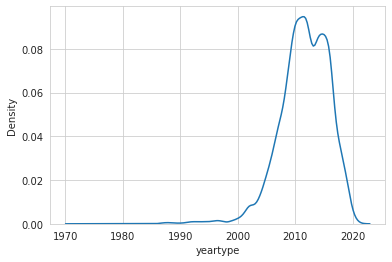

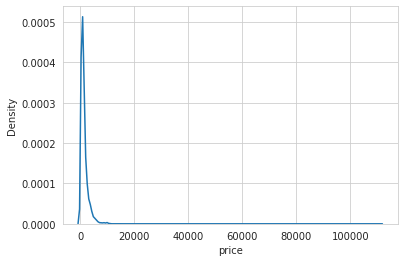

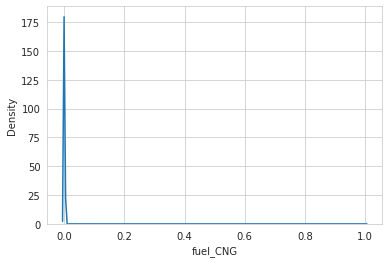

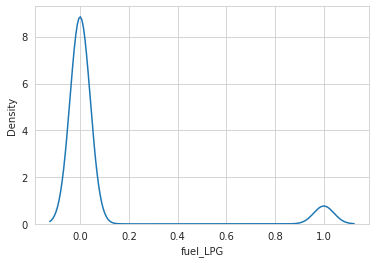

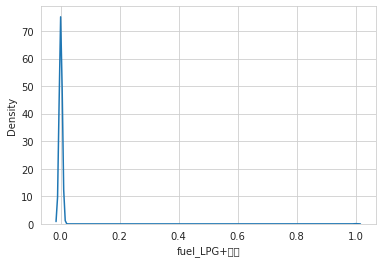

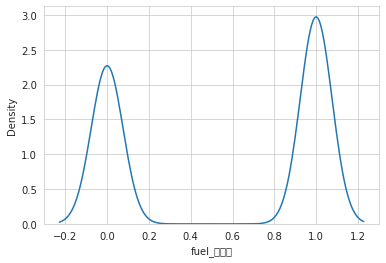

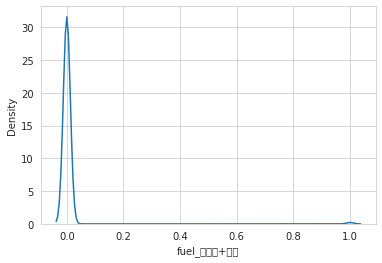

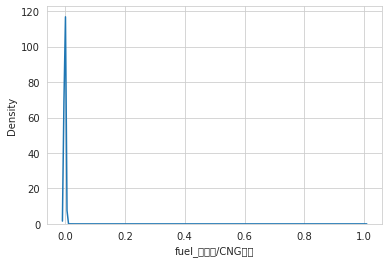

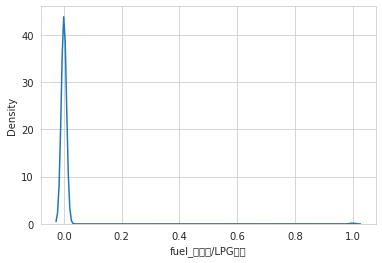

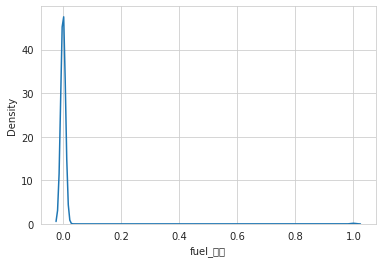

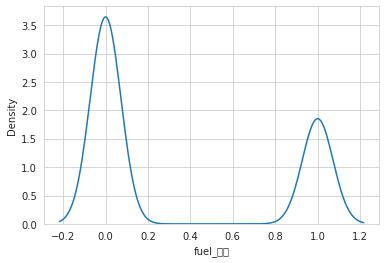

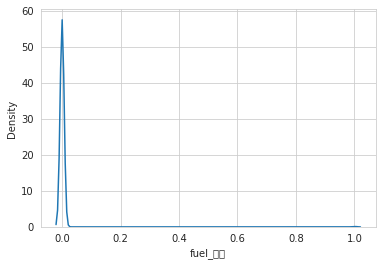

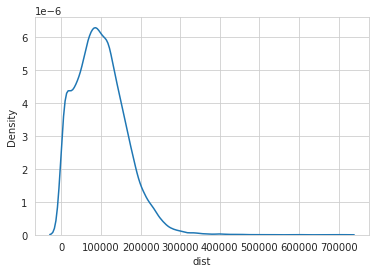

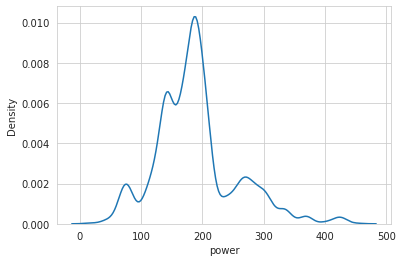

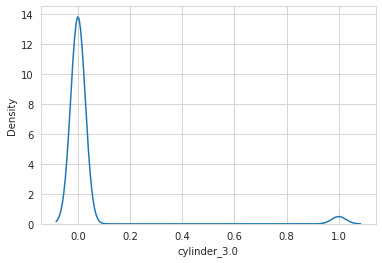

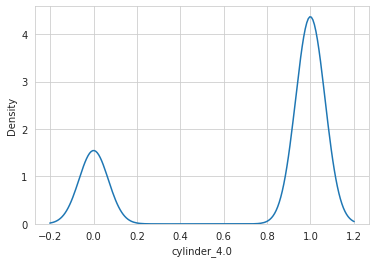

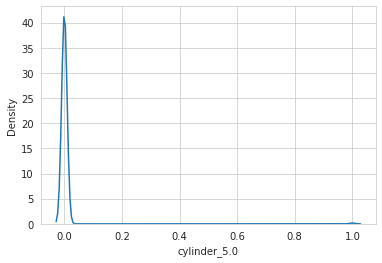

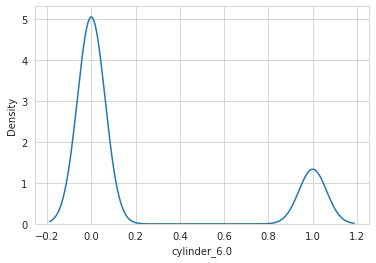

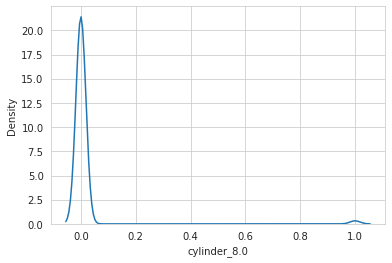

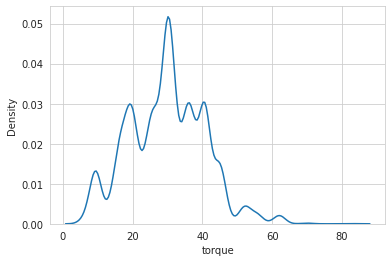

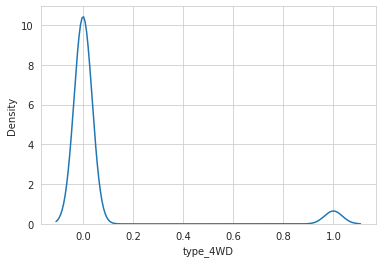

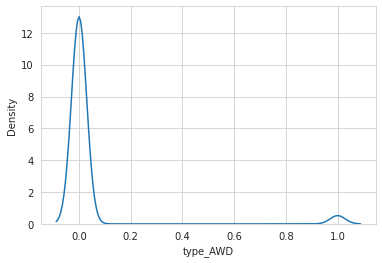

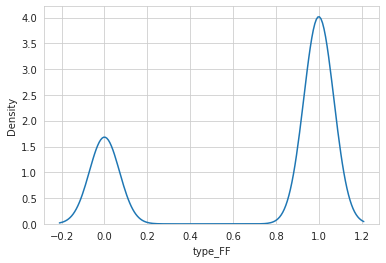

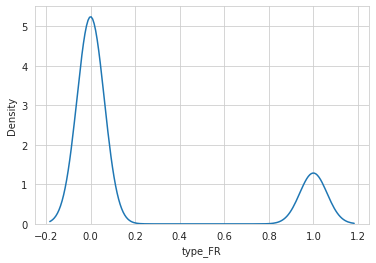

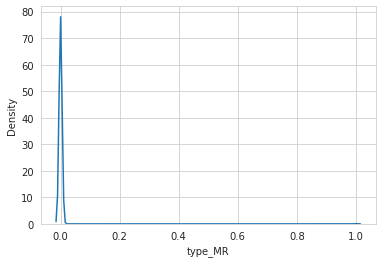

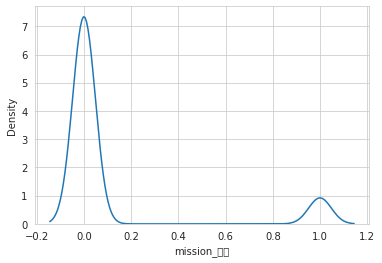

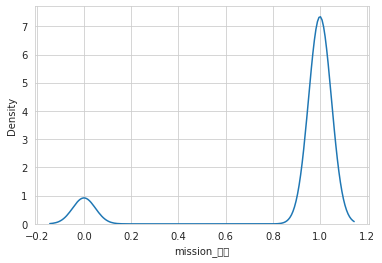

In [161]:
for c in train.columns:
  sns.kdeplot(train[c])
  plt.show()

In [162]:
skew_columns = ['yeartype', 'price']

In [163]:
train['yeartype'] = np.log1p(train['yeartype'])
test['yeartype'] = np.log1p(test['yeartype'])

train['dist'] = np.log1p(train['dist'])
test['dist'] = np.log1p(test['dist'])

train['price'] = np.log1p(train['price'])

# 데이터 나누기

In [164]:
X_train = train.drop(['price'], axis=1)
Y_train = train['price']
X_test = test.copy()

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)

(11766, 26)
(11766,)
(5789, 26)


# Model

In [165]:
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [166]:
def print_best_params(model, params):
    grid_model = GridSearchCV(
        model, 
        param_grid = params,
        cv=5,
        scoring='neg_mean_squared_error')

    grid_model.fit(X_train, Y_train)
    rmse = np.sqrt(-1*grid_model.best_score_)
    print(
        '{0} 5 CV 시 최적 평균 RMSE 값 {1}, 최적 alpha:{2}'.format(model.__class__.__name__, np.round(rmse, 4), grid_model.best_params_))
    return grid_model.best_estimator_

In [167]:
xgb_params ={
    'learning_rate': [0.05],
    'max_depth': [5],
    'subsample': [0.9],
    'colsample_bytree': [0.5],
    'silent': [True],
    'gpu_id':[0] ,
    'tree_method':['gpu_hist'],
    'predictor':['gpu_predictor'],
    'n_estimators':[1000],
    'refit' : [True]
}

xgb_model = xgb.XGBRegressor()
xgb_estimator = print_best_params(xgb_model, xgb_params)

XGBRegressor 5 CV 시 최적 평균 RMSE 값 0.537, 최적 alpha:{'colsample_bytree': 0.5, 'gpu_id': 0, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 1000, 'predictor': 'gpu_predictor', 'refit': True, 'silent': True, 'subsample': 0.9, 'tree_method': 'gpu_hist'}


In [168]:
lgb_params = {
    'objective':['regression'],
    'num_leave' : [1],
    'learning_rate' : [0.05],
    'n_estimators':[1000],
    'max_bin' : [80],
    'gpu_id':[0] ,         
    'tree_method':['gpu_hist'],
    'predictor':['gpu_predictor'],
    'refit':[True]
}

lgb_model = lgb.LGBMRegressor()
lgb_estimator = print_best_params(lgb_model, lgb_params)

LGBMRegressor 5 CV 시 최적 평균 RMSE 값 0.5401, 최적 alpha:{'gpu_id': 0, 'learning_rate': 0.05, 'max_bin': 80, 'n_estimators': 1000, 'num_leave': 1, 'objective': 'regression', 'predictor': 'gpu_predictor', 'refit': True, 'tree_method': 'gpu_hist'}


# Prediction

In [169]:
xgb_preds = xgb_estimator.predict(X_test)
lgb_preds = lgb_estimator.predict(X_test)
preds = 0.5* xgb_preds + 0.5*lgb_preds

preds = np.exp(preds)

In [170]:
submission = pd.DataFrame({
    "no": test_no,
    "가격(만원)": preds
})
submission.to_csv('/content/drive/My Drive/dg_univ_2020_ml/output/v1.2.2.xgb_lgb_cv_log2.csv', index=False)